In [60]:
import numpy as np
import xtrack as xt
import xobjects as xo
import xpart as xp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import constants 
from matplotlib.patches import Patch
#### PLOT THE DATA #######
SMALL_SIZE = 13.5
MEDIUM_SIZE = 17
BIGGER_SIZE = 23
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [61]:
from ion_properties import ions


In [62]:
# context = xo.ContextCpu(omp_num_threads=4)
context = xo.ContextCpu()

line = xt.Line.from_json('sps.json')
particle_ref=line.particle_ref
line.build_tracker()

clight=constants.speed_of_light
circumference=line.get_length()

Loading line from dict:   0%|          | 0/38786 [00:00<?, ?it/s]

Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


Loop over both sig_delta and emittance

In [63]:
# # Load the data from the saved .npz file
loaded_data = np.load('../linear_lattice/results/cooling_rates.npz')
transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
#longitundinal_growth_rate=loaded_data['longitundinal_growth_rate']


0it [00:00, ?it/s]

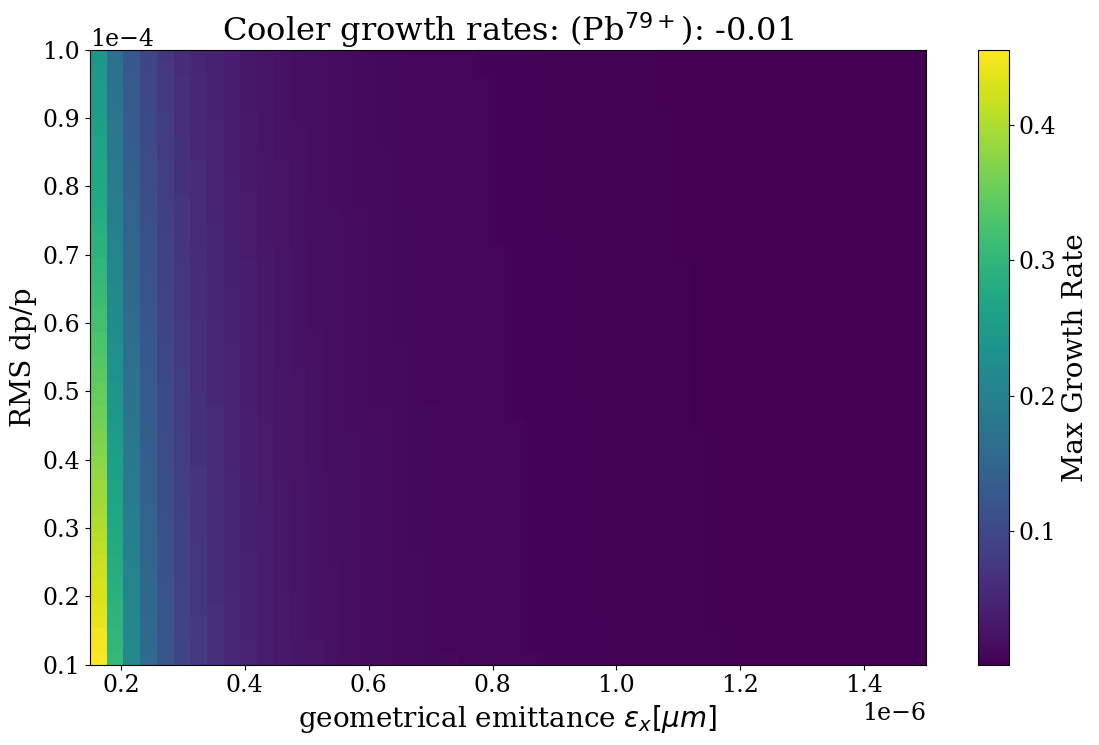

1it [00:00,  2.82it/s]

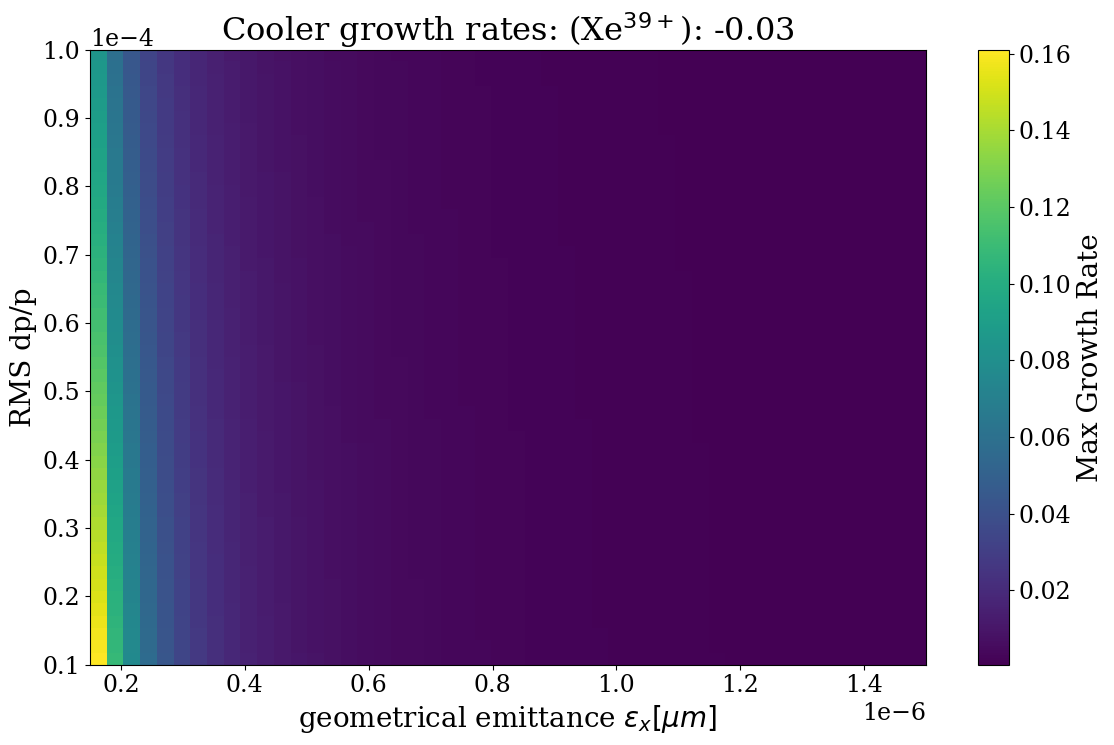

2it [00:00,  2.99it/s]

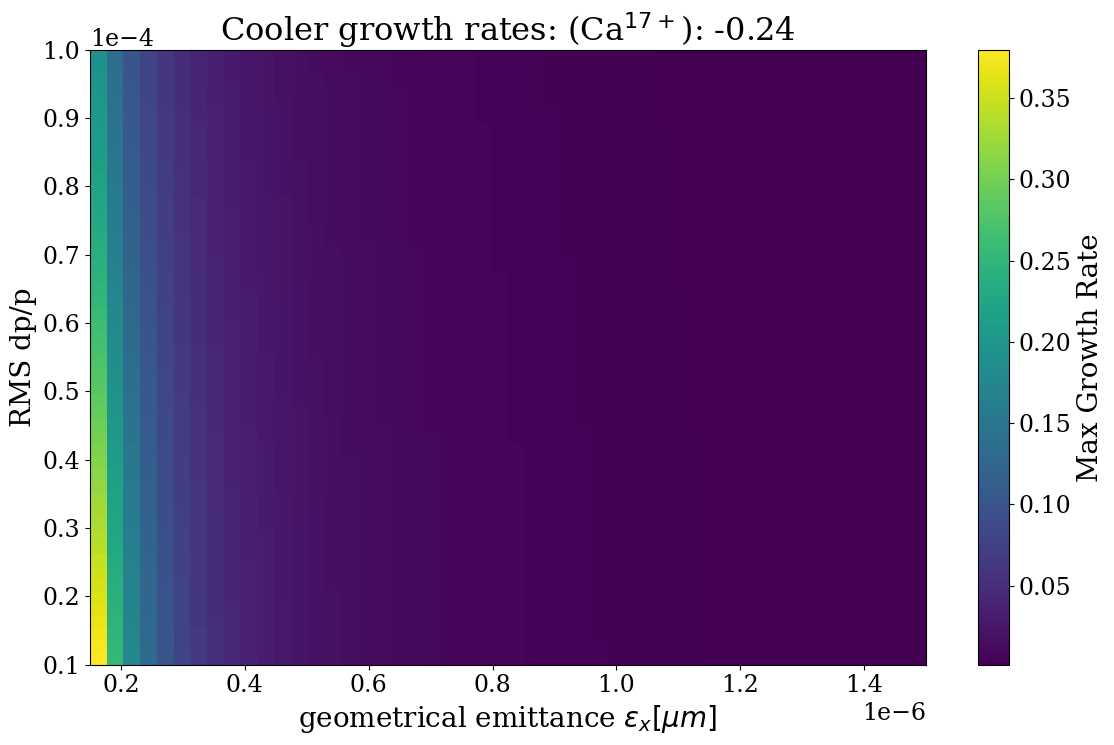

3it [00:01,  3.00it/s]


In [64]:
for i,ion_loop in tqdm(enumerate(ions)):

    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    #max_growth_rate=np.maximum(growth_rates_2d_x,growth_rates_2d_y,growth_rates_2d_z)
    max_growth_rate = np.maximum.reduce([growth_rates_2d_x, growth_rates_2d_y, growth_rates_2d_z])
    max_growth_rate=growth_rates_2d_x
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']


    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})

    # Plot the heatmap
    plt.imshow(max_growth_rate, extent=[n_emitt_list.min(), n_emitt_list.max(), sig_delta_list[0], sig_delta_list[-1]],
               aspect='auto', origin='lower', cmap='viridis')
  
    cbar = plt.colorbar()
    cbar.set_label('Max Growth Rate', fontsize=20)

    #contour = plt.contour(geo_epsx_list, sig_delta_list, growth_rates_2d_x, levels=[threshold], colors='red', linewidths=2)
    plt.xlabel('geometrical emittance $\epsilon_x [\mu m]$', fontsize=20)
    plt.ylabel('RMS dp/p', fontsize=20)
    plt.title(f'Cooler growth rates: ({ion_loop.name}): {transverse_growth_rate_list[i]:.2f}')
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    
    plt.tight_layout()

    # plt.savefig('Lead_cooling_IBS_regime.png', dpi=300)

    plt.show()


0it [00:00, ?it/s]/tmp/pkruyt/ipykernel_159023/828229278.py:20: UserWarning: linewidths is ignored by contourf
  plt.contourf(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[0,threshold_transverse], colors='green', linewidths=2)
/tmp/pkruyt/ipykernel_159023/828229278.py:21: UserWarning: linewidths is ignored by contourf
  plt.contourf(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_transverse,np.inf], colors='red', linewidths=2)


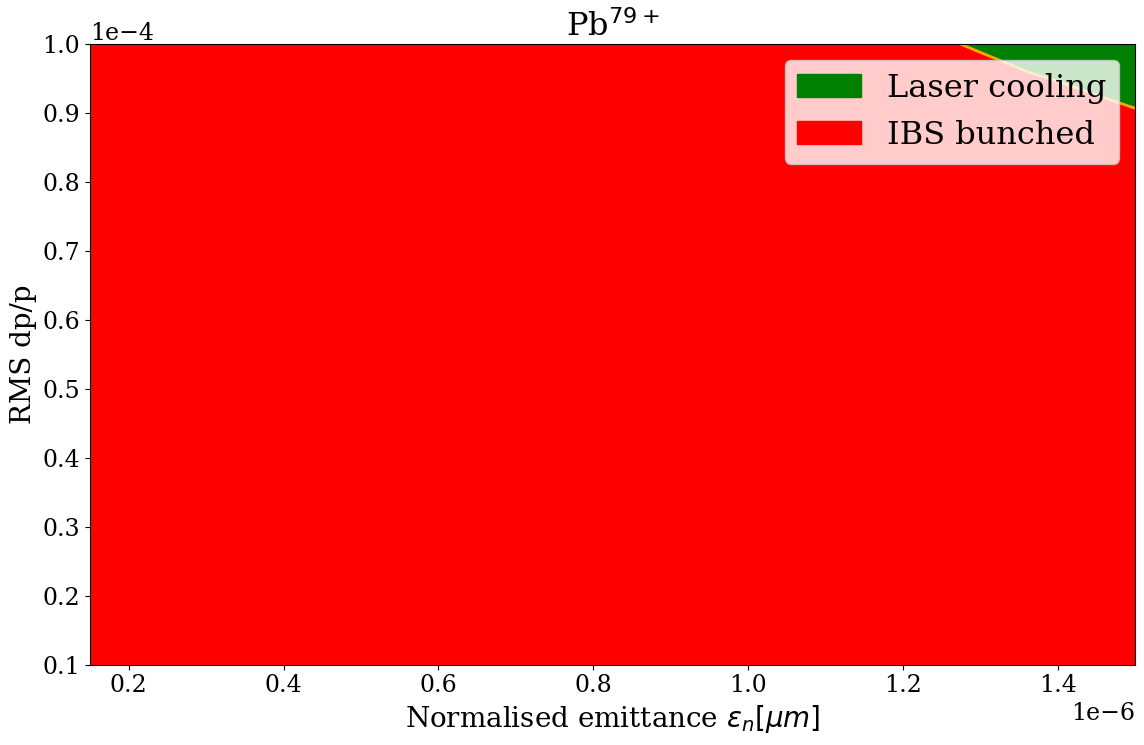

1it [00:00,  3.37it/s]

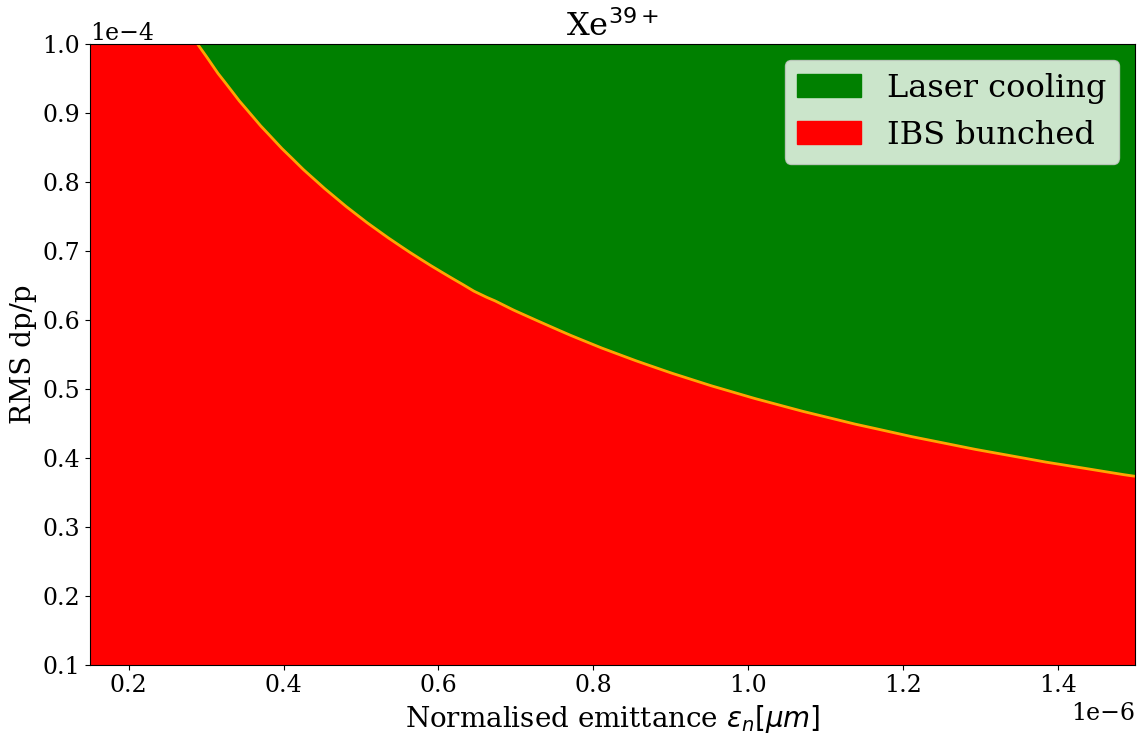

2it [00:00,  3.56it/s]

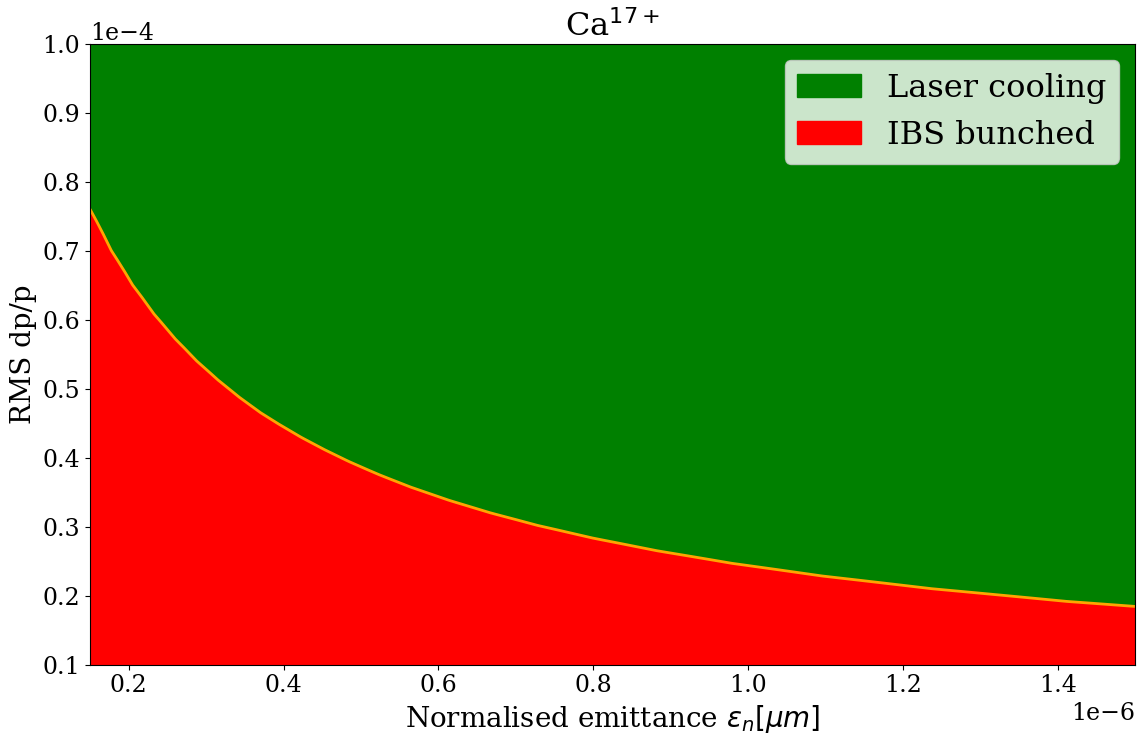

3it [00:00,  3.48it/s]


In [71]:
for i,ion_loop in tqdm(enumerate(ions)):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    max_growth_rate = np.maximum.reduce([growth_rates_2d_x, growth_rates_2d_y, growth_rates_2d_z])
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']


    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})
    threshold_transverse = -transverse_growth_rate_list[i]  # Set the threshold value
    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_transverse], colors='orange', linewidths=2)
    plt.contourf(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[0,threshold_transverse], colors='green', linewidths=2)
    plt.contourf(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_transverse,np.inf], colors='red', linewidths=2)

    plt.xlabel('Normalised emittance $\epsilon_n [\mu m]$', fontsize=20)
    plt.ylabel('RMS dp/p', fontsize=20)
    plt.title(f'{ion_loop.name}')
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    plt.legend(handles=[
        Patch(color='green', label='Laser cooling'),
        Patch(color='red', label='IBS bunched')
    ])
    plt.tight_layout()
    plt.show()

All contours in one Figure

look seperately at longitudinal and transverse

3it [00:00, 99.63it/s]


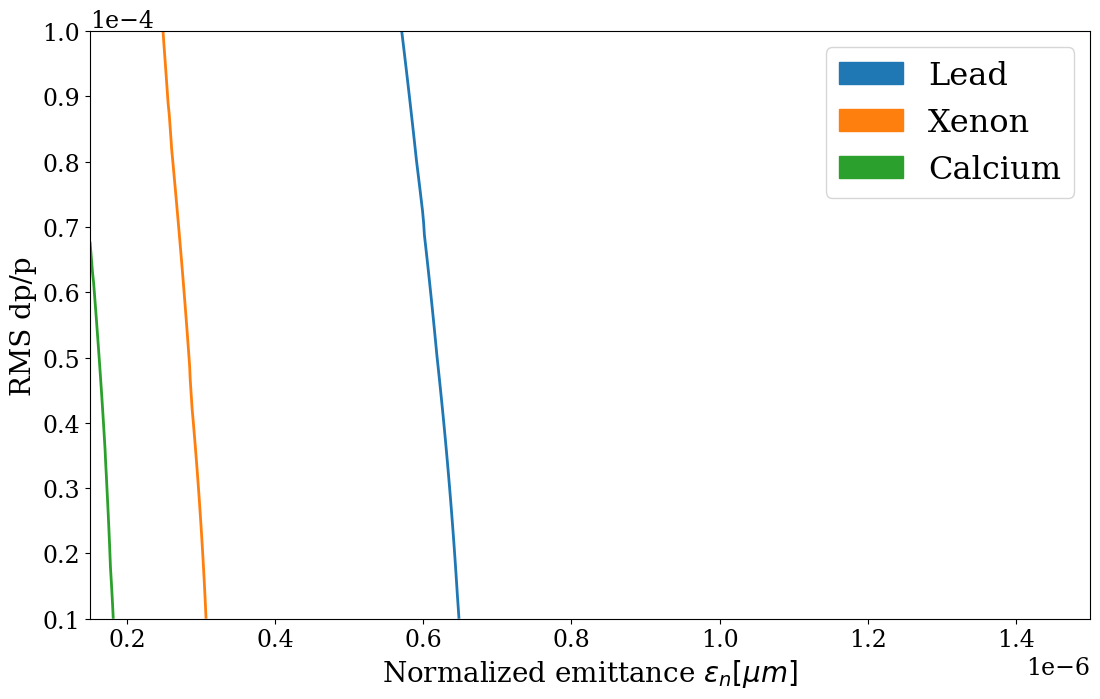

In [66]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 40})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ion_loop in tqdm(enumerate(ions)):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']
    
    threshold = -transverse_growth_rate_list[i]  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold, np.inf], colors=cycle[i], linewidths=2)

    plt.xlabel('Normalized emittance $\epsilon_n [\mu m]$', fontsize=20)
    plt.ylabel('RMS dp/p', fontsize=20)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=[
    Patch(color=cycle[0], label='Lead'),
    Patch(color=cycle[1], label='Xenon'),
    Patch(color=cycle[2], label='Calcium')
])
plt.tight_layout()
plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()

Only look at transverse growth rates

3it [00:00, 61.19it/s]


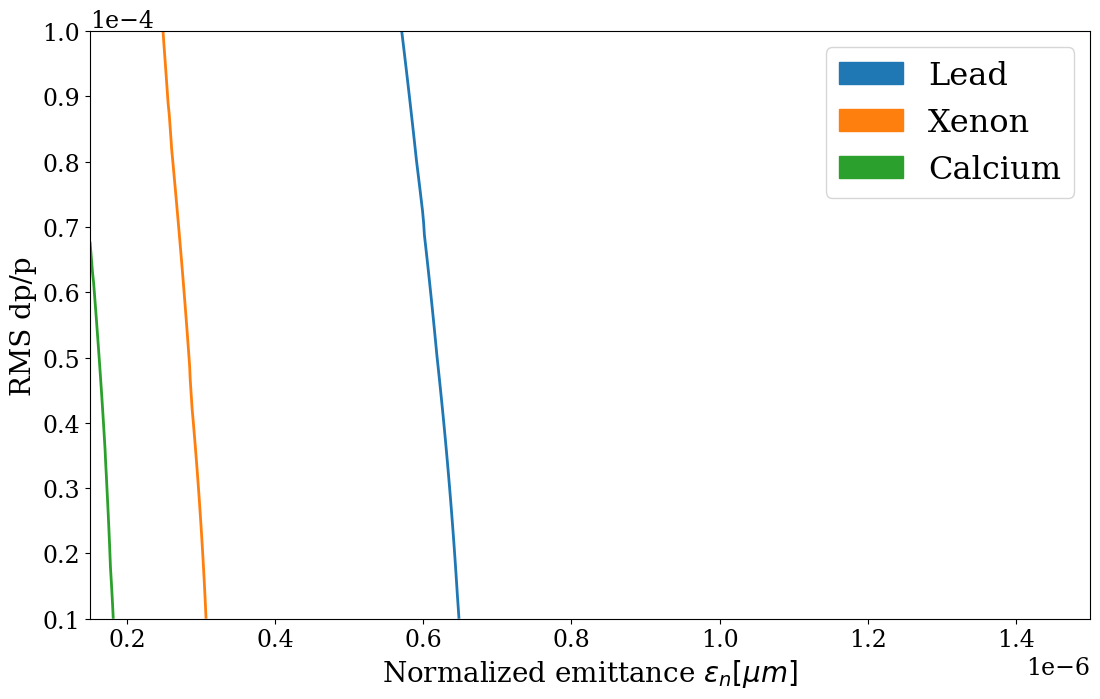

In [67]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 40})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ion_loop in tqdm(enumerate(ions)):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    # growth_rates_2d_y = data['growth_rates_2d_y']
    # growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']
    
    threshold = -transverse_growth_rate_list[i]  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold, np.inf], colors=cycle[i], linewidths=2)

    plt.xlabel('Normalized emittance $\epsilon_n [\mu m]$', fontsize=20)
    plt.ylabel('RMS dp/p', fontsize=20)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=[
    Patch(color=cycle[0], label='Lead'),
    Patch(color=cycle[1], label='Xenon'),
    Patch(color=cycle[2], label='Calcium')
])
plt.tight_layout()
plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()

Draw arrows for cooling

3it [00:00, 24.21it/s]


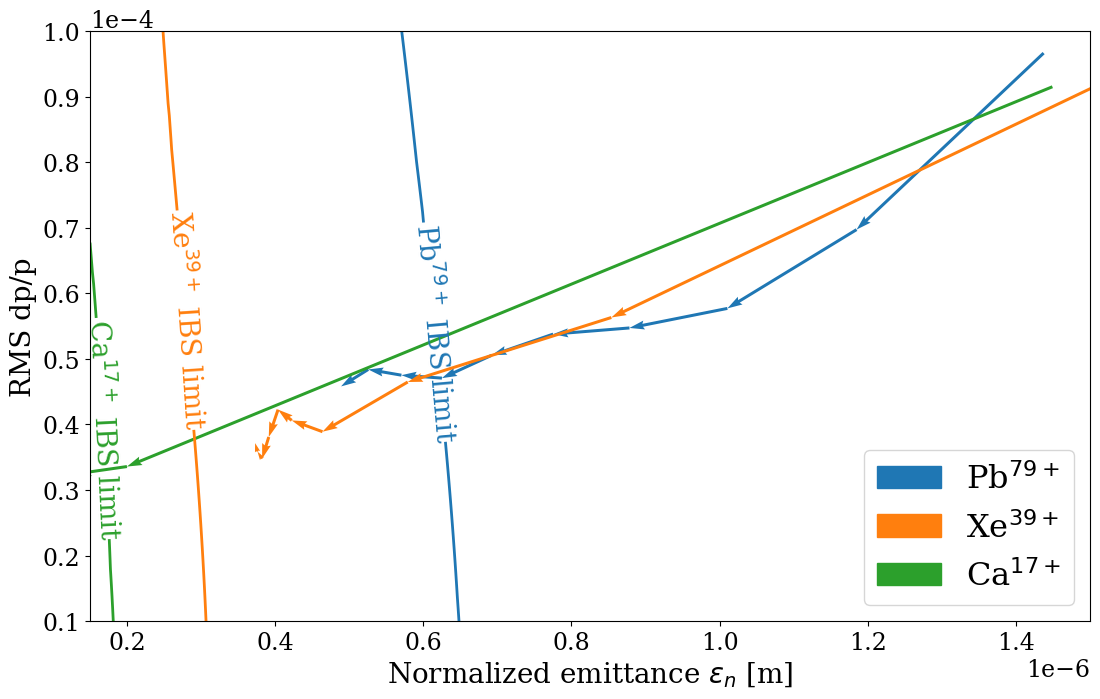

In [69]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 40})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ion_loop in tqdm(enumerate(ions)):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')
    linear_results = np.load(f'../linear_lattice/results/{ion_loop.name}.npz')

    delta = linear_results['delta']
    emittance_x = linear_results['emittance_x']
    time=linear_results['time']
    rms_dp_p = np.std(delta, axis=1)

    index_closest_to_40 = np.argmin(np.abs(time - 40))

    emittance_x_values = emittance_x[:]
    rms_dp_p_values = rms_dp_p[:]
    
    # Plot the contour
    growth_rates_2d_x = data['growth_rates_2d_x']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']
    threshold = -transverse_growth_rate_list[i]  # Set the threshold value
    contour = plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold], colors=cycle[i], linewidths=2)
    
    # Label the contour lines with IBS limit
    #plt.clabel(contour, inline=True, fontsize=20, fmt='%1.2f')
    plt.clabel(contour, inline=True, fontsize=20, fmt=f'{ion_loop.name} IBS limit')

    # Define the number of segments for each arrow
    num_segments = 10
    
    # Calculate the step size for each segment
    step_size = len(time) // num_segments
    
    # Plot each segment as a quiver plot
    for j in range(num_segments - 1):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = (j + 1) * step_size
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_values[start_idx]
        end_x = emittance_x_values[end_idx]
        
        start_y = rms_dp_p_values[start_idx]
        end_y = rms_dp_p_values[end_idx]
        
        # Plot the quiver plot for the segment
        plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1, scale_units='xy', angles='xy', color=cycle[i], width=0.003)
   
   
plt.xlim([n_emitt_list[0],n_emitt_list[-1]])
plt.xlabel('Normalized emittance $\epsilon_n$ [m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend(handles=[
    Patch(color=cycle[0], label=f'{ions[0].name}'),
    Patch(color=cycle[1], label=f'{ions[1].name}'),
    Patch(color=cycle[2], label=f'{ions[2].name}'),
], loc='lower right')


plt.tight_layout()
plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()


In [70]:
# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})

# cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# for i, ion_loop in tqdm(enumerate(ions)):    
#     data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

#     growth_rates_2d_x = data['growth_rates_2d_x']
#     growth_rates_2d_y = data['growth_rates_2d_y']
#     growth_rates_2d_z = data['growth_rates_2d_z']
#     sig_delta_list = data['sig_delta_list']
#     n_emitt_list = data['n_emitt_list']
#     total_intensity = data['total_intensity']
    
#     threshold = longitundinal_growth_rate[i]  # Set the threshold value
   
#     plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold, np.inf], colors=cycle[i], linewidths=2)

#     plt.xlabel('Normalized emittance $\epsilon_n [\mu m]$', fontsize=20)
#     plt.ylabel('RMS dp/p', fontsize=20)
#     plt.title(f'{ion_loop.name}')
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#     plt.legend(handles=[
#         Patch(color='orange', label='Threshold'),
#         Patch(color='green', label='Laser cooling'),
#         Patch(color='red', label='IBS bunched')
#     ])
# plt.tight_layout()

# plt.show()